# 페르마의 정리
   > n이 2보다 큰 자연수인 경우에 a<sup>n</sup> + b<sup>n</sup> = c<sup>n</sup> 이 되는 자연수 a, b, c 는 존재하지 않는다  
   > n이 3이고 a, b, c가 1부터 10까지 자연수 일 때 페르마의 마지막 정리가 사실임을 증명하시오  
- (for문을 이용하여 증명하시오)

In [407]:
for i in range(1, 11, 1):
    for j in range(1, 11, 1):
        for k in range(1, 11, 1):
            if i ** 3 + j ** 3 == k ** 3:
                print(i, '의 3승 + ', j,  '의 3승 = ', k,  '의 3승')

# max() 함수 만들기
1. max() 함수는 개수가 가변인 인자의 값들을 비교하여 가장 큰 수를 돌려주는 함수이다. 
2. 이 함수와 같은 행동를 하는 함수를 생성
    - 개수가 가변인 매개변수 생성
    - for문과 if문을 이용하여 함수를 생성

In [408]:
def large(*args):
    larger_num = args[0]
    for num in args:
        if num >= larger_num:
            larger_num = num
    return larger_num

print(large(8, 3, 2, 54, 6, 3, 76, 8, 3, 4, 5))
print(large(-8, -3, -2, -54, -6, -3, -76, -8, -3, -4, -5))


76
-2


# 카드 이용 내역

- test_csv 폴더의 유통+업종 데이터를 로드하여 문제를 푸시오

1. 각 컬럼의 이름을 변경 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
2. 기준년월을 시계열로 변경
3. index를 기준년월 변경
4. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크
5. 성별 컬럼의 데이터 값을 1은 남자, 2는 여자 변경
6. 남, 녀 성별을 기준으로 연도별 건당 이용 금액의 평균이 몇인지 출력 & 시각화

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

In [410]:
df = pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [411]:
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [412]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

In [413]:
df = df.set_index('기준년월')
df.head()

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10


In [414]:
df.isna().sum()

업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [415]:
def sex(x):
    if x == 1:
        return "남자"
    elif x == 2:
        return "여자"


df['성별'] = df['성별'].apply(sex)
df.head()

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,남자,1,1,7.600000e+03
2019-01-01,백화점,남자,10,379,1.945872e+07
2019-01-01,백화점,남자,20,45173,4.747711e+09
2019-01-01,백화점,남자,30,271858,2.791826e+10
2019-01-01,백화점,남자,40,391109,3.791149e+10


<Axes: xlabel='성별,기준년월'>

C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\

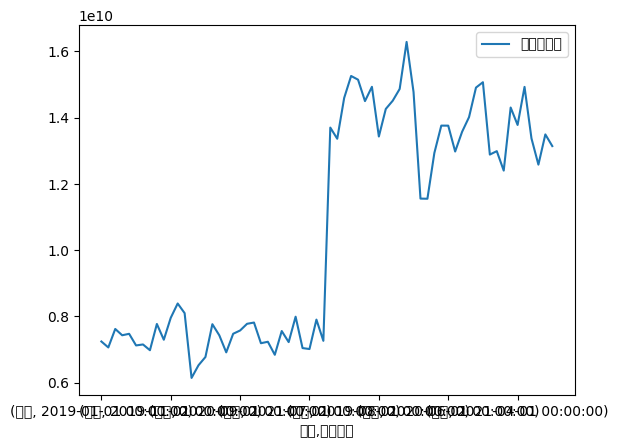

In [416]:
df_pivot_table = pd.pivot_table(df, index = ['성별','기준년월'], values = '총이용금액', aggfunc = 'mean')
df_pivot_table.plot()

## 온라인 카드 매출과 오프라인 카드매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
3. 1,2번과정에서 나온 데이터를 plot 그래프를 그려서 차이를 확인
4. 2개의 데이터프레임을 단순한 행 결합
    - df_online에 업종 파생 변수 생성 값은 "온라인"
    - df와 df_online 데이터프레임을 행 결합
    - 월별, 업종별로 총 이용 금액을 pivot_table을 이용하여 그래프 시각화

In [417]:
df = pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')
df = df.set_index('기준년월')
df = df.groupby('기준년월').sum()[['총이용금액']]

C:\Users\ezen\AppData\Local\Temp\ipykernel_720\664445275.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('기준년월').sum()[['총이용금액']]


In [418]:
df_online = pd.read_csv('../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')
df_online = df_online.set_index('기준년월')
df_online = df_online.groupby('기준년월').sum()[['총이용금액']]

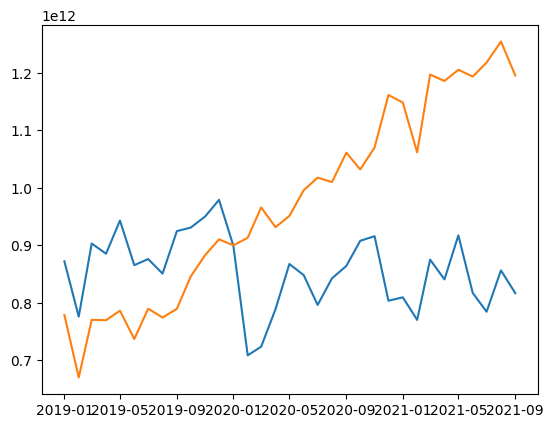

In [419]:
dataframe = pd.DataFrame()
dataframe['df'] = df
dataframe['df_online'] = df_online
plt.plot(dataframe)

In [420]:
df = pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

df_online = pd.read_csv('../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')

df_online['업종'] = '온라인'

new_df = df.append(df_online, ignore_index = True)

C:\Users\ezen\AppData\Local\Temp\ipykernel_720\2643118273.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append(df_online, ignore_index = True)


<Axes: xlabel='기준년월'>

C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\s

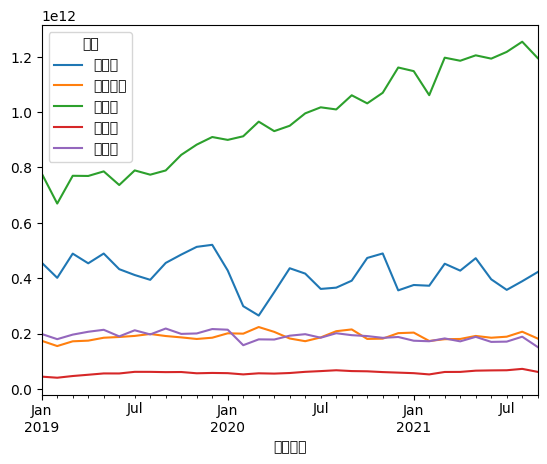

In [421]:
pd.pivot_table(new_df, index = '기준년월', columns = '업종', values = '총이용금액', aggfunc = 'sum').plot()